# ** ELC hackathon 2023

Based on Stable Diffusion 


credits: Code Forked from  https://github.com/TheLastBen/fast-stable-diffusion,  

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
#@markdown # Install/Update AUTOMATIC1111 repo
from IPython.utils import capture
from IPython.display import clear_output
from subprocess import getoutput
import ipywidgets as widgets
import sys
import fileinput
import os
import time

if not os.path.exists("/content/gdrive/MyDrive/"):
  print('[1;31mGdrive not connected, using colab storage ...')
  time.sleep(4)
  !mkdir -p /content/gdrive/MyDrive/
with capture.capture_output() as cap:
  def inf(msg, style, wdth): inf = widgets.Button(description=msg, disabled=True, button_style=style, layout=widgets.Layout(min_width=wdth));display(inf)
  fgitclone = "git clone --depth 1"
  %mkdir -p /content/gdrive/MyDrive/sd
  %cd /content/gdrive/MyDrive/sd
  !$fgitclone -q --branch master https://github.com/AUTOMATIC1111/stable-diffusion-webui
  !mkdir -p /content/gdrive/MyDrive/sd/stable-diffusion-webui/cache/huggingface
  !ln -s /content/gdrive/MyDrive/sd/stable-diffusion-webui/cache/huggingface /root/.cache/

with capture.capture_output() as cap:
  %cd /content/gdrive/MyDrive/sd/stable-diffusion-webui/
  !git reset --hard
  time.sleep(1)
  !rm webui.sh
print('[1;32m')
!git pull
clear_output()
inf('\u2714 Done','success', '50px')

Button(button_style='success', description='✔ Done', disabled=True, layout=Layout(min_width='50px'), style=But…

In [3]:
#@markdown # Requirements

print('[1;32mInstalling requirements...')

with capture.capture_output() as cap:
  %cd /content/ 
  !wget -q -i https://raw.githubusercontent.com/TheLastBen/fast-stable-diffusion/main/Dependencies/A1111.txt
  !dpkg -i *.deb
  if not os.path.exists('/content/gdrive/MyDrive/sd/stablediffusion'):
    !tar -C / --zstd -xf sd.tar.zst 
  !tar -C / --zstd -xf gcolabdeps.tar.zst
  !rm *.deb | rm *.zst | rm *.txt
  %env LD_PRELOAD=libtcmalloc.so
  os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

clear_output()
inf('\u2714 Done','success', '50px')

Button(button_style='success', description='✔ Done', disabled=True, layout=Layout(min_width='50px'), style=But…

In [4]:
#@markdown # Model Download/Load
Model_Version = "1.5" #@param [ "1.5", "v1.5 Inpainting ", "V2.1-512px", "V2.1-768px"]

Redownload_the_original_model = False #@param {type:"boolean"}

def rmv():
  !wget -q -O /content/gdrive/MyDrive/sd/stable-diffusion-webui/models/Stable-diffusion/model.ckpt https://raw.githubusercontent.com/TheLastBen/fast-stable-diffusion/main/precompiled/README.md
  !mv /content/gdrive/MyDrive/sd/stable-diffusion-webui/models/Stable-diffusion/model.ckpt /content/gdrive/MyDrive/sd/stable-diffusion-webui/models/Stable-diffusion/trashfile.f
  time.sleep(2)
  !rm /content/gdrive/MyDrive/sd/stable-diffusion-webui/models/Stable-diffusion/trashfile.f
  clear_output()

if Redownload_the_original_model:
  with capture.capture_output() as cap:
    rmv()

#@markdown Or
Path_to_MODEL = "" #@param {type:"string"}
#@markdown - Insert the full path of your trained model or to a folder containing multiple models.

#@markdown Or
MODEL_LINK = "" #@param {type:"string"}
safetensors = False #@param {type:"boolean"}
Use_temp_storage = False #@param {type:"boolean"}



def newmdl():

    if not os.path.exists('/content/gdrive/MyDrive/sd/stable-diffusion-webui/models/Stable-diffusion/model.ckpt'):
      %cd /content/
      clear_output()
      !git init
      !git lfs install --system --skip-repo
      !$fgitclone --branch fp16 "https://huggingface.co/runwayml/stable-diffusion-v1-5"
      if os.path.exists('/content/stable-diffusion-v1-5/unet/diffusion_pytorch_model.bin'):
        !wget -q -O stable-diffusion-v1-5/vae/diffusion_pytorch_model.bin https://huggingface.co/stabilityai/sd-vae-ft-mse/resolve/main/diffusion_pytorch_model.bin
        !wget -O convertosd.py https://github.com/TheLastBen/fast-stable-diffusion/raw/main/Dreambooth/convertosd.py
        !sed -i '201s@.*@    model_path = "/content/stable-diffusion-v1-5"@' /content/convertosd.py
        !sed -i '202s@.*@    checkpoint_path= "/content/gdrive/MyDrive/sd/stable-diffusion-webui/models/Stable-diffusion/model.ckpt"@' /content/convertosd.py
        clear_output()       
        !python /content/convertosd.py
        !rm /content/convertosd.py
        if os.path.exists('/content/gdrive/MyDrive/sd/stable-diffusion-webui/models/Stable-diffusion/model.ckpt'):
          model='/content/gdrive/MyDrive/sd/stable-diffusion-webui/models/Stable-diffusion/model.ckpt'
          clear_output()
          inf('\u2714 Done','success', '50px')
        else:
          inf('\u2718 Something went wrong, try again','danger', "250px")
      else:
        inf('\u2718 Something went wrong','danger', "200px")

    else:
      model='/content/gdrive/MyDrive/sd/stable-diffusion-webui/models/Stable-diffusion/model.ckpt'
      clear_output()
      inf('\u2714 Model already exists, check the box "Redownload_the_original_model" to redownload/download the V1.5','primary', '700px')

    if os.path.exists('/content/.git'):
      !rm -r /content/.git

    if os.path.exists('/content/stable-diffusion-v1-5'):
      !rm -r /content/stable-diffusion-v1-5

    return model

def V2():

    if not os.path.exists('/content/gdrive/MyDrive/sd/stable-diffusion-webui/models/Stable-diffusion/model.ckpt'):
      %cd /content/
      clear_output()
      !mkdir "/content/stable-diffusion-V2"
      %cd "/content/stable-diffusion-V2"
      !git init
      !git lfs install --system --skip-repo
      if Model_Version == "V2.1-768px":
        !git remote add -f origin  "https://huggingface.co/stabilityai/stable-diffusion-2-1"
      elif Model_Version == "V2.1-512px":
        !git remote add -f origin  "https://huggingface.co/stabilityai/stable-diffusion-2-1-base"
      !git config core.sparsecheckout true
      !echo -e "scheduler\ntext_encoder\ntokenizer\nunet\nvae\nfeature_extractor\nmodel_index.json\n!*.safetensors" > .git/info/sparse-checkout
      !git pull origin fp16
      %cd /content
      !wget -O convertosdv2.py https://github.com/TheLastBen/fast-stable-diffusion/raw/main/Dreambooth/convertosdv2.py
      clear_output()
      !python /content/convertosdv2.py --fp16 /content/stable-diffusion-V2 /content/gdrive/MyDrive/sd/stable-diffusion-webui/models/Stable-diffusion/model.ckpt
      !rm /content/convertosdv2.py
      if os.path.exists('/content/gdrive/MyDrive/sd/stable-diffusion-webui/models/Stable-diffusion/model.ckpt'):
        model='/content/gdrive/MyDrive/sd/stable-diffusion-webui/models/Stable-diffusion/model.ckpt'
        clear_output()
        inf('\u2714 Done','success', '50px')
      else:
        inf('\u2718 Something went wrong, try again','danger', "250px")

    else:
      model='/content/gdrive/MyDrive/sd/stable-diffusion-webui/models/Stable-diffusion/model.ckpt'
      clear_output()
      inf('\u2714 Model already exists, check the box "Redownload_the_original_model" to redownload/download the V2','primary', '700px')

    if os.path.exists('/content/.git'):
      !rm -r /content/.git
      !rm -r /content/convertosdv2.py
    if os.path.exists('/content/stable-diffusion-V2'):
      !rm -r /content/stable-diffusion-V2

    return model

def inpmdl():

    if not os.path.exists('/content/gdrive/MyDrive/sd/stable-diffusion-webui/models/Stable-diffusion/sd-v1-5-inpainting.ckpt'):
      %cd /content/
      clear_output()
      !git init
      !git lfs install --system --skip-repo
      !$fgitclone --branch fp16 "https://huggingface.co/runwayml/stable-diffusion-inpainting"
      if os.path.exists('/content/stable-diffusion-inpainting'):
        !$fgitclone "https://huggingface.co/stabilityai/sd-vae-ft-mse"
        !rm -r /content/stable-diffusion-inpainting/vae
        !mv /content/sd-vae-ft-mse /content/stable-diffusion-inpainting/vae        
        !wget -O convertosd.py https://github.com/TheLastBen/fast-stable-diffusion/raw/main/Dreambooth/convertosd.py
        !sed -i '201s@.*@    model_path = "/content/stable-diffusion-inpainting"@' /content/convertosd.py
        !sed -i '202s@.*@    checkpoint_path= "/content/gdrive/MyDrive/sd/stable-diffusion-webui/models/Stable-diffusion/sd-v1-5-inpainting.ckpt"@' /content/convertosd.py
        clear_output()       
        !python /content/convertosd.py
        !rm /content/convertosd.py
        if os.path.exists('/content/gdrive/MyDrive/sd/stable-diffusion-webui/models/Stable-diffusion/sd-v1-5-inpainting.ckpt'):
          model='/content/gdrive/MyDrive/sd/stable-diffusion-webui/models/Stable-diffusion/sd-v1-5-inpainting.ckpt'
          clear_output()
          inf('\u2714 Done','success', '50px')
        else:
          inf('\u2718 Something went wrong, try again','danger', "250px")
      else:
        inf('\u2718 Something went wrong','danger', "200px")


    else:
      model='/content/gdrive/MyDrive/sd/stable-diffusion-webui/models/Stable-diffusion/sd-v1-5-inpainting.ckpt'
      clear_output()
      inf('\u2714 inpainting model already exists','primary', '250px')

    if os.path.exists('/content/.git'):
      !rm -r /content/.git

    if os.path.exists('/content/stable-diffusion-inpainting'):
      !rm -r /content/stable-diffusion-inpainting

    return model

if (Path_to_MODEL !=''):
  if os.path.exists(str(Path_to_MODEL)):
    inf('\u2714 Using the trained model.','success', '200px')

  else:
      while not os.path.exists(str(Path_to_MODEL)):
        inf('\u2718 Wrong path, use the colab file explorer to copy the path : ','danger', "400px")
        Path_to_MODEL=input()
      if os.path.exists(str(Path_to_MODEL)):
        inf('\u2714 Using the trained model.','success', '200px')

  model=Path_to_MODEL

elif MODEL_LINK != "":
  gdrv="/content/gdrive/MyDrive/sd/stable-diffusion-webui/models/Stable-diffusion"
  tmp="/content"
  pth=tmp if Use_temp_storage else gdrv
  %cd $pth
  clear_output()
  if not safetensors:
    modelname="model.ckpt"
  else:
    modelname="model.safetensors"
  !gdown --fuzzy -O $modelname "$MODEL_LINK"
  if os.path.exists(f'{pth}/{modelname}') and os.path.getsize(f'{pth}/{modelname}') > 1810671599:    
      model=f'{pth}/{modelname}'
      clear_output()
      inf('\u2714 Model downloaded, using the trained model.','success', '350px')
  else:
    if Use_temp_storage:
      !rm $pth/$modelname
    else:
      rmv()
    inf('\u2718 Wrong link, check that the link is valid','danger', "300px")


elif Model_Version=="1.5":
  model=newmdl()

elif Model_Version=="V2.1-512px" or Model_Version=="V2.1-768px":
  model=V2()

else:
   model=inpmdl()

Button(button_style='primary', description='✔ Model already exists, check the box "Redownload_the_original_mod…

In [5]:
#@markdown # ControlNet
from torch.hub import download_url_to_file
from urllib.parse import urlparse
import re

Model = "OpenPose" #@param [ "None", "All", "Canny", "Depth", "HED", "MLSD", "Normal", "OpenPose", "Scribble", "Seg", "T2iadapter_Models"]

v2_Model = "None" #@param [ "None", "All", "Canny", "Depth", "HED", "OpenPose", "Scribble"]

#@markdown - Download/update ControlNet extension and its models.

def download(url, model_dir):

    filename = os.path.basename(urlparse(url).path)
    pth = os.path.abspath(os.path.join(model_dir, filename))
    if not os.path.exists(pth):
        print('Downloading: '+os.path.basename(url))
        download_url_to_file(url, pth, hash_prefix=None, progress=True)
    else:
      print(f"[1;32mThe model {filename} already exists[0m")

Canny='https://huggingface.co/webui/ControlNet-modules-safetensors/resolve/main/control_canny-fp16.safetensors'
Depth='https://huggingface.co/webui/ControlNet-modules-safetensors/resolve/main/control_depth-fp16.safetensors'
HED='https://huggingface.co/webui/ControlNet-modules-safetensors/resolve/main/control_hed-fp16.safetensors'
MLSD='https://huggingface.co/webui/ControlNet-modules-safetensors/resolve/main/control_mlsd-fp16.safetensors'
Normal='https://huggingface.co/webui/ControlNet-modules-safetensors/resolve/main/control_normal-fp16.safetensors'
OpenPose='https://huggingface.co/webui/ControlNet-modules-safetensors/resolve/main/control_openpose-fp16.safetensors'
Scribble='https://huggingface.co/webui/ControlNet-modules-safetensors/resolve/main/control_scribble-fp16.safetensors'
Seg='https://huggingface.co/webui/ControlNet-modules-safetensors/resolve/main/control_seg-fp16.safetensors'

with capture.capture_output() as cap:
  %cd /content/gdrive/MyDrive/sd/stable-diffusion-webui/extensions
  if not os.path.exists("sd-webui-controlnet"):
    !git clone https://github.com/Mikubill/sd-webui-controlnet.git
    %cd /content
  else:
    %cd sd-webui-controlnet
    !git reset --hard
    !git pull
    %cd /content

mdldir="/content/gdrive/MyDrive/sd/stable-diffusion-webui/extensions/sd-webui-controlnet/models"
for filename in os.listdir(mdldir):
  if "_sd14v1" in filename:
    renamed = re.sub("_sd14v1", "-fp16", filename)
    os.rename(os.path.join(mdldir, filename), os.path.join(mdldir, renamed))

!wget -q -O CN_models.txt https://github.com/TheLastBen/fast-stable-diffusion/raw/main/AUTOMATIC1111_files/CN_models.txt
!wget -q -O CN_models_v2.txt https://github.com/TheLastBen/fast-stable-diffusion/raw/main/AUTOMATIC1111_files/CN_models_v2.txt

with open("CN_models.txt", 'r') as f:
  mdllnk = f.read().splitlines()
with open("CN_models_v2.txt", 'r') as d:
  mdllnk_v2 = d.read().splitlines()

!rm CN_models.txt CN_models_v2.txt

if Model == "All": 
  for lnk in mdllnk:
      download(lnk, mdldir)
  clear_output()

elif Model == "T2iadapter_Models":
  mdllnk=list(filter(lambda x: 't2i' in x, mdllnk))
  for lnk in mdllnk:
      download(lnk, mdldir)
  clear_output()

elif Model == "None":
    pass
    clear_output()

else:
  download(globals()[Model], mdldir)
  clear_output()

Canny='https://huggingface.co/thibaud/controlnet-sd21/resolve/main/canny-sd21-safe.safetensors'
Depth='https://huggingface.co/thibaud/controlnet-sd21/resolve/main/depth-sd21-safe.safetensors'
HED='https://huggingface.co/thibaud/controlnet-sd21/resolve/main/hed-sd21-safe.safetensors'
OpenPose='https://huggingface.co/thibaud/controlnet-sd21/resolve/main/openpose-sd21-safe.safetensors'
Scribble='https://huggingface.co/thibaud/controlnet-sd21/resolve/main/scribble-sd21-safe.safetensors'

if v2_Model == "All":
  for lnk_v2 in mdllnk_v2:
      download(lnk_v2, mdldir)
  clear_output()
  inf('\u2714 Done','success', '50px')

elif v2_Model == "None":
    pass
    clear_output()
    inf('\u2714 Done','success', '50px')

else:
  download(globals()[v2_Model], mdldir)
  clear_output()
  inf('\u2714 Done','success', '50px')

Button(button_style='success', description='✔ Done', disabled=True, layout=Layout(min_width='50px'), style=But…

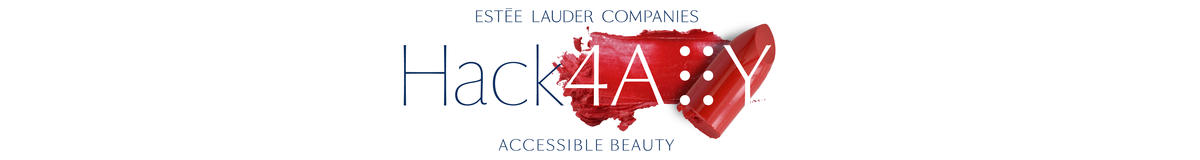

In [ ]:
#@markdown # Start Stable-Diffusion
from IPython.utils import capture
import time
import sys
import fileinput

Use_localtunnel = False #@param {type:"boolean"}

User = "" #@param {type:"string"}
Password= "" #@param {type:"string"}
#@markdown - Add credentials to your Gradio interface (optional).

auth=f"--gradio-auth {User}:{Password}"
if User =="" or Password=="":
  auth=""

with capture.capture_output() as cap:
  if not os.path.exists('/tools/node/bin/lt'):
    !npm install -g localtunnel

with capture.capture_output() as cap:
  %cd /content/gdrive/MyDrive/sd/stable-diffusion-webui/modules/
  !wget -O paths.py https://raw.githubusercontent.com/TheLastBen/fast-stable-diffusion/main/AUTOMATIC1111_files/paths.py
  !wget -O extras.py https://raw.githubusercontent.com/AUTOMATIC1111/stable-diffusion-webui/master/modules/extras.py
  !wget -O sd_models.py https://raw.githubusercontent.com/AUTOMATIC1111/stable-diffusion-webui/master/modules/sd_models.py
  !wget -q -O /usr/local/lib/python3.9/dist-packages/gradio/blocks.py https://raw.githubusercontent.com/TheLastBen/fast-stable-diffusion/main/AUTOMATIC1111_files/blocks.py
  %cd /content/gdrive/MyDrive/sd/stable-diffusion-webui/

  !sed -i "s@os.path.splitext(checkpoint_file)@os.path.splitext(checkpoint_file); map_location='cuda'@" /content/gdrive/MyDrive/sd/stable-diffusion-webui/modules/sd_models.py
  !sed -i 's@ui.create_ui().*@ui.create_ui();shared.demo.queue(concurrency_count=999999,status_update_rate=0.1)@' /content/gdrive/MyDrive/sd/stable-diffusion-webui/webui.py
  !sed -i "s@map_location='cpu'@map_location='cuda'@" /content/gdrive/MyDrive/sd/stable-diffusion-webui/modules/extras.py

share=''
if not Use_localtunnel:
  share='--share'

else:
  with capture.capture_output() as cap:
    share=''
    %cd /content
    !nohup lt --port 7860 > srv.txt 2>&1 &
    time.sleep(2)
    !grep -o 'https[^ ]*' /content/srv.txt >srvr.txt
    time.sleep(2)
    srv= getoutput('cat /content/srvr.txt')

    for line in fileinput.input('/usr/local/lib/python3.9/dist-packages/gradio/blocks.py', inplace=True):
      if line.strip().startswith('self.server_name ='):
          line = f'            self.server_name = "{srv[8:]}"\n'
      if line.strip().startswith('self.protocol = "https"'):
          line = '            self.protocol = "https"\n'
      if line.strip().startswith('if self.local_url.startswith("https") or self.is_colab'):
          line = ''
      if line.strip().startswith('else "http"'):
          line = ''
      sys.stdout.write(line)
            
    !rm /content/srv.txt /content/srvr.txt
    %cd /content/gdrive/MyDrive/sd/stable-diffusion-webui

try:
  model
  if os.path.isfile(model):
    !python /content/gdrive/MyDrive/sd/stable-diffusion-webui/webui.py $share --api --disable-safe-unpickle --enable-insecure-extension-access --no-download-sd-model --no-half-vae  --ckpt "$model" --xformers $auth --disable-console-progressbars
  else:
    !python /content/gdrive/MyDrive/sd/stable-diffusion-webui/webui.py $share --api --disable-safe-unpickle --enable-insecure-extension-access --no-download-sd-model --no-half-vae  --ckpt-dir "$model" --xformers $auth --disable-console-progressbars
except:
   !python /content/gdrive/MyDrive/sd/stable-diffusion-webui/webui.py $share --api --disable-safe-unpickle --enable-insecure-extension-access --no-download-sd-model --no-half-vae --xformers $auth --disable-console-progressbars

Loading weights [4c86efd062] from /content/gdrive/MyDrive/sd/stable-diffusion-webui/models/Stable-diffusion/model.ckpt
Creating model from config: /content/gdrive/MyDrive/sd/stable-diffusion-webui/configs/v1-inference.yaml
LatentDiffusion: Running in eps-prediction mode
DiffusionWrapper has 859.52 M params.
Applying xformers cross attention optimization.
Textual inversion embeddings loaded(0): 
Model loaded in 26.4s (load weights from disk: 20.5s, create model: 1.2s, apply weights to model: 3.1s, apply half(): 0.9s, move model to device: 0.7s).
Running on public URL: https://83588aed-f718-4bae.gradio.live
✔ Connected
Startup time: 51.9s (import gradio: 3.5s, import ldm: 9.4s, other imports: 4.8s, list extensions: 0.3s, setup codeformer: 0.1s, load scripts: 2.5s, load SD checkpoint: 26.4s, create ui: 0.5s, gradio launch: 4.1s, scripts app_started_callback: 0.1s).
100% 16/16 [00:05<00:00,  2.69it/s]
100% 16/16 [00:02<00:00,  6.27it/s]
100% 16/16 [00:02<00:00,  6.30it/s]
100% 16/16 [00:02